# Introdução à Ciência de Dados

## Projeto Final - Rentabilidade de IPOs Brasileiros

### Integrantes:
Davi Ribeiro Pereira Pinto - 20200023844

Gabriel Araújo de Azevedo Lima - 20200026120

Thalles Emannuel Batista Pinheiro - 20200025580


# 1 Introdução

## 1.1 Motivação

O que são IPOs
Quais operações são feitas: Flippagem
Aumento significativo da quantidade nos anos passados




## 1.2 Objetivos

1 - Calcular as rentabilidades médias dos IPOs realizados e buscar correlações para realizar entradas nos possíveis melhores IPOs futuros.

# 2 Dados utilizados

Para realizar deste trabalho foram extraídos da B3 as cotações históricas das ações negociadas bem como o relatorio das ofertas públicas relaizadas.  

Todos os dados utilizados estão disponível no [Github](https://github.com/davirpp/Projeto_Intro_CD/tree/master/datasets).

## 2.1 Cotações históricas

Os dados utilizados foram as cotações históricas retiradas do site oficial da [B3](http://www.b3.com.br/pt_br/market-data-e-indices/servicos-de-dados/market-data/historico/mercado-a-vista/series-historicas/).

## 2.2 Cotação Índice Ibovespa
Os dados utilizados foram retirados do site da [Investing](https://br.investing.com/indices/bovespa-historical-data) as cotações diárias do Índice Ibovespa do dia 05/06/2015 até 09/06/2021 (data que compreende nossos dados).

## 2.3 Ofertas públicas

Foram retirados dados detalhados das Ofertas Públicas do site da [B3](http://www.b3.com.br/pt_br/produtos-e-servicos/solucoes-para-emissores/ofertas-publicas/estatisticas/).

# 3 Pré-processamento

## 3.1 Cotações Históricas

Nas células abaixos ocorre o pré-processamento dos dados conforme instruções contidas no layout adotado pela B3.
Que pode ser visto em: [Layout](http://www.b3.com.br/data/files/33/67/B9/50/D84057102C784E47AC094EA8/SeriesHistoricas_Layout.pdf).

In [115]:
import pandas as pd
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import numpy as np
from scipy.stats import linregress
sns.set_palette('Dark2')

In [2]:
# year_i = int(input('Insira o ano de início: '))
# year_f = int(input('Insira o ano de término: '))
# years = list(range(year_i,year_f+1))

# list_ipos = ["PARC3", "WIZS3", "AALR3",
#              "MOVI3", "PARD3", "AZUL4", "CRFB3", "IRBR3", "OMGE3", "CAML3", "BKBR3", "BRDT3",
#              "GNDI3", "HAPV3", "BIDI4",
#              "SBFG3", "CNTO3","NEOE3", "VIVA3", "BMGB4", "CEAB3", 
#              "MTRE3", "LWSA3", "MDNE3", "PRNR3", "ALPK3", "AMBP3", "SOMA3", "DMVF3", "LJQQ3", "LAVV3", "PGMN3",
#              "PETZ3", "PLPL3", "MELK3", "HBSA3", "CURY3", "BOAS3", "SEQL3", "GMAT3", "TFCO4", "CASH3", "ENJU3", 
#              "AERI3", "RRRP3", "AVLL3", "RDOR3", "NGRD3", "HBRE3", "VAMO3", "ESPA3", "INTB3", "MOSI3", "MBLY3", 
#              "JALL3", "POWE3", "CSED3", "OPCT3", "ORVR3", "ELMD3", "BMOB3", "CMIN3", "WEST3", "MODL11", "MATD3", 
#              "BLAU3", "GGPS3", "SOJA3", "RECV3", "CXSE3", "ALLD3"]

# def b3_parser(year):
#     cota = open(f"./datasets/datab3/COTAHIST_A{year}.txt",'r')
#     head = cota.readline()
#     line = cota.readline()
#     all_data = []
#     size = [2, 8, 2, 12, 3, 12, 10, 3, 4, 13, 13, 13, 13, 13, 13, 13, 5, 18, 18, 13, 1, 8, 7, 13, 12, 3]
#     col = ['tipreg', 'date', 'codbdi', 'codneg', 'tpmerc', 'nomres', 'especi', 'prazot', 'modref', 'preabe', 
#            'premax', 'premin', 'premed', 'preult', 'preofc', 'preofv', 'totneg', 'quatot', 'voltot', 'preexe', 
#            'indopc', 'datven', 'fatcot', 'ptoexe', 'codisi', 'dismes']
#     #OBS.: The name of the columns is a pattern adopted by B3
    
#     while line:
#         dt = []
#         x = 0
#         for s in size: 
#             dt.append(line[x:x+s]) 
#             x+=s 
#         all_data.append(dt)
#         line = cota.readline()
#         if line.startswith('99'): 
#             break

#     df = pd.DataFrame(data=all_data,columns=col)
#     col = ['tipreg',  'codbdi',  'tpmerc', 'totneg', 'quatot', 'indopc', 'datven', 'fatcot',  'dismes']
#     for c in col:
#         df[c]=pd.to_numeric(df[c], downcast="integer")

#     col = ['preabe', 'premax', 'premin', 'premed', 'preult', 'preofc', 'preofv','voltot', 'preexe','ptoexe']
#     for c in col:
#         df[c] = df[c].astype(float)/100

#     col = ['date','datven']
#     for c in col:
#         df[c] = pd.to_datetime(df[c],format='%Y%m%d',errors='coerce')

#     col = ['codneg']
#     for c in col:
#         df[c] = df[c].str.strip()
    
#     return df

# def listFilter(dataframe, valores):
#     return dataframe.loc[dataframe['codneg'].isin(valores)]

# df_list = []
# for year in years:
#     df = b3_parser(year)
#     df = listFilter(df, list_ipos)
    
#     # CELL TO CHOOSE DESIRABLE COLUMNS
#     df = df[['date','codneg','preabe','preult']]
    
#     # RESETING INDEX
#     df = df.reset_index(drop=True)
    
#     # TRANSFORMING THE DATAFRAME IN CSV BY YEARS
#     df.to_csv(f"COTAHIST_A{year}.csv", index = False)
    
#     df_list.append(df)

# df = pd.read_csv(f"./COTAHIST_A{year_i}.csv")
# for year in range(year_i+1, year_f+1):
#     df = pd.concat([df, pd.read_csv(f"./COTAHIST_A{year}.csv")])

# df.loc[df.codneg=='PARC3', 'codneg'] = 'WIZS3'
# df.loc[df.codneg=='CNTO3', 'codneg'] = 'SBFG3'

# # RESETING INDEX
# df = df.reset_index(drop=True)

# # TRANSFORMING THE DATAFRAME IN CSV OF ALL YEARS
# df.to_csv(f"COTAHIST_A{year_i}_{year_f}.csv", index = False)

## 3.2 Cotação Índice Ibovespa 

In [3]:
# def create_ibov():
#     pass
#     cota_ibov = pd.read_csv("./datasets/Cota_ibov.csv")
#     def format_number(texto):    
#         return float(texto.replace('.', '').replace(',', '.'))

#     def format_percent(texto):   
#         return float(texto.replace(',', '.').replace('%', ''))

#     cota_ibov['Último'] = cota_ibov.apply(lambda x: format_number(x['Último']), axis=1)
#     cota_ibov['Var%'] = cota_ibov.apply(lambda x: format_percent(x['Var%']), axis=1)

#     ibov = cota_ibov[['Data', 'Último', 'Var%']].copy()

#     ibov['Data'] = ibov.apply(lambda x: pd.to_datetime(x['Data'],format='%d.%m.%Y',errors='coerce'), axis=1)
#     ibov = ibov.sort_values(by='Data', ascending = True)
#     ibov = ibov.reset_index(drop=True)

#     #Creating a column to calculate the acumulated rentability
#     ibov['Cumulative'] = 0

#     for i in range((ibov.index.max()) + 1):
#         ibov.loc[i,'Cumulative'] = (((ibov.loc[i, 'Último'] / ibov.loc[0, 'Último']) - 1) * 100)

#     # TRANSFORMING THE DATAFRAME IN CSV 
#     ibov.to_csv(f"COTAHIST_IBOV.csv", index = False)

# 4 Perguntas

In [4]:
#cotações brutas sem levar em conta desdobramentos:
ipo_df = pd.read_csv("./datasets/COTAHIST_A2015_2021.csv")
ipo_details = pd.read_excel("./datasets/IPO_details.xlsx")
cota_ibov = pd.read_csv("./datasets/COTAHIST_IBOV.csv")
investidores = pd.read_excel("./datasets/Investidores.xlsx")
covid_df = pd.read_csv("./datasets/covid.csv")

In [5]:
investidores = investidores.melt(id_vars='Ano', value_vars=['Homens', 'Mulheres']).rename(columns={"variable": 'Genero', 
                                                                                                   "value": 'Quantidade'})

In [6]:
investidores

,Ano,Genero,Quantidade
0,2021,Homens,2707331
1,2020,Homens,2382966
2,2019,Homens,1277424
3,2018,Homens,634269
4,2017,Homens,478258
5,2016,Homens,434141
6,2015,Homens,424977
7,2014,Homens,426650
8,2013,Homens,440727
9,2012,Homens,438600


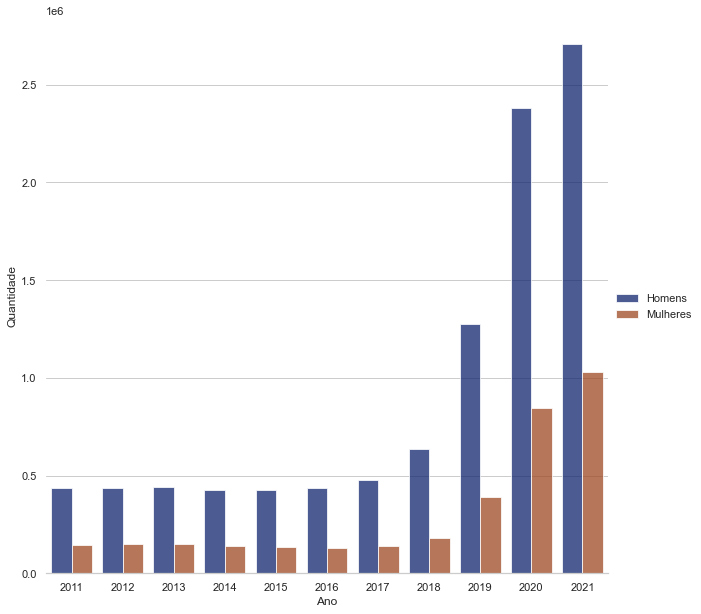

In [7]:
import seaborn as sns

sns.set_theme(style="whitegrid")

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=investidores, kind="bar",
    x="Ano", y="Quantidade", hue="Genero",
    ci="sd", palette="dark", alpha=.75, height=8.5)

g.despine(left=True)
g.set_axis_labels("Ano", "Quantidade")
g.legend.set_title("")

In [8]:
tickers = list(ipo_details.Tickers)
openings = list(ipo_details.Preco_fixado)
dict_tickers = dict(zip(tickers, openings))

## 4.1 Quantos IPO's foram realizados de 2015 à Maio de 2021?

In [9]:
date_list = []
for ticker in tickers:
    df = ipo_df[ipo_df.codneg==ticker]
    df.sort_values(by='date')
    date_list.append(df["date"].iloc[0])
    
date_ipo_df = pd.DataFrame(list(zip(tickers, date_list)), columns=["tickers", "date"])
date_ipo_df["date"] = pd.to_datetime(date_ipo_df["date"], format='%Y-%m-%d')
date_ipo_df['year'] = date_ipo_df.apply(lambda x: x.date.year,axis=1)
date_ipo_df['month'] = date_ipo_df.apply(lambda x: x.date.month,axis=1)

In [10]:
date_ipo_df

,tickers,date,year,month
0,WIZS3,2015-06-05,2015,6
1,AALR3,2016-10-28,2016,10
2,MOVI3,2017-02-08,2017,2
3,PARD3,2017-02-14,2017,2
4,AZUL4,2017-04-11,2017,4
...,...,...,...,...
64,GGPS3,2021-04-26,2021,4
65,SOJA3,2021-04-29,2021,4
66,CXSE3,2021-04-29,2021,4
67,MODL11,2021-04-30,2021,4


In [11]:
#serie pandas dos anos:

ipos_per_year = date_ipo_df.groupby('year').count()
ipos_per_year = ipos_per_year.reset_index(drop=False)[['year','tickers']]
ipos_per_year = ipos_per_year.rename(columns={'year':'Ano', 'tickers':'Quantidade'})
ipos_per_year.Ano = ipos_per_year.apply(lambda x: str(x.Ano), axis = 1)

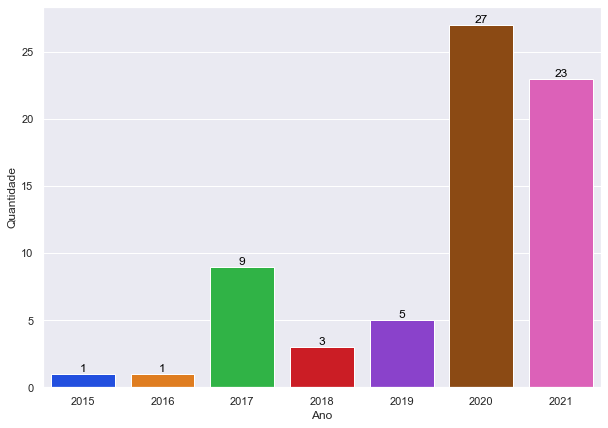

In [12]:
sns.set(rc={'figure.figsize':(10,7)})
sns.set_palette('bright')
quant_year_b = sns.barplot(x='Ano', y='Quantidade', data=ipos_per_year)
for index, row in ipos_per_year.iterrows():
    quant_year_b.text(row.name, row.Quantidade+0.175, round(row.Quantidade,2), color="black", ha="center")

## 4.2 Qual a rentabilidade dos IPOs considerando vendas dos ativos a curto, médio e longo prazo?

In [13]:
def rentability(ticker, dias_uteis, dict_ticker=dict_tickers, data=ipo_df):
    ticker = ticker.upper()
    df = data[data.codneg==ticker]
    df = df.reset_index(drop=True)
    variation = ((df["preult"].iloc[dias_uteis-1]/dict_ticker[ticker])-1)*100
    return variation

In [14]:
ipos_2015 = date_ipo_df[(date_ipo_df['date'] >= '2015-01-01') & (date_ipo_df['date'] <= '2015-12-31')]
ipos_2016 = date_ipo_df[(date_ipo_df['date'] >= '2016-01-01') & (date_ipo_df['date'] <= '2016-12-31')]
ipos_2017 = date_ipo_df[(date_ipo_df['date'] >= '2017-01-01') & (date_ipo_df['date'] <= '2017-12-31')]
ipos_2018 = date_ipo_df[(date_ipo_df['date'] >= '2018-01-01') & (date_ipo_df['date'] <= '2018-12-31')]
ipos_2019 = date_ipo_df[(date_ipo_df['date'] >= '2019-01-01') & (date_ipo_df['date'] <= '2019-12-31')]
ipos_2020 = date_ipo_df[(date_ipo_df['date'] >= '2020-01-01') & (date_ipo_df['date'] <= '2020-12-31')]
ipos_2021 = date_ipo_df[(date_ipo_df['date'] >= '2021-01-01') & (date_ipo_df['date'] <= '2021-06-09')]
ipos_list = [ipos_2015, ipos_2016, ipos_2017, ipos_2018, ipos_2019, ipos_2020, ipos_2021]

### 2015

In [15]:
ipos_2015.tickers

0    WIZS3
Name: tickers, dtype: object

In [16]:
rent_df_15 = pd.DataFrame(columns=["1D", "1M", "3M", "6M"])
time = [1, 20, 60, 120]
tickers_15 = ipos_2015["tickers"]
for t in tickers_15:
    rent_df_15.loc[t] = [rentability(t, c) for c in time]
rent_df_15['year'] = 2015
rent_df_15.describe()

,1D,1M,3M,6M,year
count,1.000000,1.000000,1.000000,1.000000,1.0
mean,12.733171,14.111922,8.678021,-15.247364,2015.0
std,NaN,NaN,NaN,NaN,NaN
min,12.733171,14.111922,8.678021,-15.247364,2015.0
25%,12.733171,14.111922,8.678021,-15.247364,2015.0
50%,12.733171,14.111922,8.678021,-15.247364,2015.0
75%,12.733171,14.111922,8.678021,-15.247364,2015.0
max,12.733171,14.111922,8.678021,-15.247364,2015.0


### 2016

In [17]:
ipos_2016.tickers

1    AALR3
Name: tickers, dtype: object

In [18]:
rent_df_16 = pd.DataFrame(columns=["1D", "1M", "3M", "6M"])
time = [1, 20, 60, 120]
tickers_16 = ipos_2016["tickers"]
for t in tickers_16:
    rent_df_16.loc[t] = [rentability(t, c) for c in time]
rent_df_16['year'] = 2016
rent_df_16.describe()

,1D,1M,3M,6M,year
count,1.0,1.0,1.00,1.00,1.0
mean,-4.0,-20.0,-28.05,-17.55,2016.0
std,NaN,NaN,NaN,NaN,NaN
min,-4.0,-20.0,-28.05,-17.55,2016.0
25%,-4.0,-20.0,-28.05,-17.55,2016.0
50%,-4.0,-20.0,-28.05,-17.55,2016.0
75%,-4.0,-20.0,-28.05,-17.55,2016.0
max,-4.0,-20.0,-28.05,-17.55,2016.0


### 2017

In [19]:
ipos_2017.tickers

2     MOVI3
3     PARD3
4     AZUL4
5     CRFB3
6     IRBR3
7     OMGE3
8     CAML3
9     BKBR3
10    BRDT3
Name: tickers, dtype: object

In [20]:
rent_df_17 = pd.DataFrame(columns=["1D", "1M", "3M", "6M"])
time = [1, 20, 60, 120]
tickers_17 = ipos_2017["tickers"]
for t in tickers_17:
    rent_df_17.loc[t] = [rentability(t, c) for c in time]
rent_df_17['year'] = 2017
rent_df_17.describe()

,1D,1M,3M,6M,year
count,9.000000,9.000000,9.000000,9.000000,9.0
mean,3.354082,6.391514,17.824112,16.856246,2017.0
std,4.595710,8.824979,19.853024,23.127254,0.0
min,-2.666667,-5.555556,-14.444444,-17.444444,2017.0
25%,-0.666667,0.533333,7.400000,-3.133333,2017.0
50%,5.769231,5.315789,19.190476,14.166667,2017.0
75%,6.666667,11.538462,31.600000,36.761905,2017.0
max,8.947368,20.238095,50.600000,44.631579,2017.0


### 2018

In [21]:
ipos_2018.tickers

11    GNDI3
12    HAPV3
13    BIDI4
Name: tickers, dtype: object

In [22]:
rent_df_18 = pd.DataFrame(columns=["1D", "1M", "3M", "6M"])
time = [1, 20, 60, 120]
tickers_18 = ipos_2018["tickers"]
for t in tickers_18:
    rent_df_18.loc[t] = [rentability(t, c) for c in time]
rent_df_18['year'] = 2018
rent_df_18.describe()

,1D,1M,3M,6M,year
count,3.000000,3.000000,3.000000,3.000000,3.0
mean,14.984230,15.639884,25.898537,59.599433,2018.0
std,13.444859,30.967431,22.367370,60.564852,0.0
min,-0.540541,-19.459459,2.702703,7.276596,2018.0
25%,11.093366,3.906634,15.181139,26.426177,2018.0
50%,22.727273,27.272727,27.659574,45.575758,2018.0
75%,22.746615,33.189555,37.496454,85.760852,2018.0
max,22.765957,39.106383,47.333333,125.945946,2018.0


In [23]:
#sns.set(rc={'figure.figsize':(12,8)})
#rent_df_18.boxplot(column=["1D", "1M", "3M", "6M"])

### 2019

In [24]:
ipos_2019.tickers

14    SBFG3
15    NEOE3
16    VIVA3
17    BMGB4
18    CEAB3
Name: tickers, dtype: object

In [25]:
rent_df_19 = pd.DataFrame(columns=["1D", "1M", "3M", "6M"])
time = [1, 20, 60, 120]
tickers_19 = ipos_2019["tickers"]
for t in tickers_19:
    rent_df_19.loc[t] = [rentability(t, c) for c in time]
rent_df_19['year'] = 2019
rent_df_19.describe()

,1D,1M,3M,6M,year
count,5.000000,5.000000,5.000000,5.000000,5.0
mean,-3.453271,-2.110681,4.612695,-4.094820,2019.0
std,13.997895,10.706540,30.416983,63.915550,0.0
min,-27.586207,-15.603448,-46.120690,-60.000000,2019.0
25%,-1.600000,-7.520000,-0.060606,-51.878788,2019.0
50%,0.458333,-0.848485,18.333333,-38.333333,2019.0
75%,3.090909,0.000000,20.560000,53.738019,2019.0
max,8.370607,13.418530,30.351438,76.000000,2019.0


### 2020

In [26]:
ipos_2020.tickers

19    MTRE3
20    LWSA3
21    MDNE3
22    PRNR3
23    ALPK3
24    AMBP3
25    SOMA3
26    DMVF3
27    LJQQ3
28    LAVV3
29    PGMN3
30    PETZ3
31    PLPL3
32    MELK3
33    HBSA3
34    CURY3
35    BOAS3
36    SEQL3
37    GMAT3
38    TFCO4
39    CASH3
40    ENJU3
41    AERI3
42    RRRP3
43    AVLL3
44    RDOR3
45    NGRD3
Name: tickers, dtype: object

In [27]:
rent_df_20 = pd.DataFrame(columns=["1D", "1M", "3M", "6M"])
time = [1, 20, 60, 115]
tickers_20 = ipos_2020["tickers"]
for t in tickers_20:
    rent_df_20.loc[t] = [rentability(t, c) for c in time]
rent_df_20['year'] = 2020
rent_df_20.describe()

,1D,1M,3M,6M,year
count,27.000000,27.000000,27.000000,27.000000,27.0
mean,4.899335,6.053839,19.817580,24.293593,2020.0
std,11.071188,34.456192,60.658903,59.435864,0.0
min,-9.047619,-42.736842,-69.473684,-43.085106,2020.0
25%,-1.808279,-10.695767,-13.110942,-15.619638,2020.0
50%,0.000000,3.490909,3.278689,6.141414,2020.0
75%,13.289038,12.768865,40.589111,45.434343,2020.0
max,34.000000,153.555556,224.500000,195.700000,2020.0


### 2021

In [28]:
ipos_2021.tickers

46     HBRE3
47     VAMO3
48     ESPA3
49     INTB3
50     MOSI3
51     MBLY3
52     JALL3
53     POWE3
54     CSED3
55     OPCT3
56     ORVR3
57     ELMD3
58     BMOB3
59     CMIN3
60     WEST3
61     ALLD3
62     MATD3
63     BLAU3
64     GGPS3
65     SOJA3
66     CXSE3
67    MODL11
68     RECV3
Name: tickers, dtype: object

In [29]:
rent_df_21 = pd.DataFrame(columns=["1D", "1M"])
time = [1, 20]
tickers_21 = ipos_2021["tickers"]
for t in tickers_21:
    rent_df_21.loc[t] = [rentability(t, c) for c in time]
rent_df_21['year'] = 2021
rent_df_21.describe()

,1D,1M,year
count,23.000000,23.000000,23.0
mean,9.338796,3.605040,2021.0
std,23.493599,19.084071,0.0
min,-13.152053,-23.076923,2021.0
25%,-3.198499,-6.542155,2021.0
50%,2.391629,0.055556,2021.0
75%,13.061183,15.093355,2021.0
max,96.969697,61.919192,2021.0


In [30]:
def average_rentability_lineplot():

    average_rent_dict = {2015: rent_df_15, 2016: rent_df_16, 2017: rent_df_17, 2018: rent_df_18, 2019: rent_df_19, 2020: rent_df_20,
                    2021: rent_df_21}

    total_average_dict = {}

    for c in ["1D", "1M", "3M", "6M"]:

        void_dict = {}

        for ano in range(2015, 2022):
            try:
                void_dict[ano] = [average_rent_dict[ano][c].mean(), average_rent_dict[ano][c].std()]
            except:
                void_dict[ano] = np.nan

        total_average_dict[c] = void_dict 

    return total_average_dict

In [31]:
average_lineplot = average_rentability_lineplot()

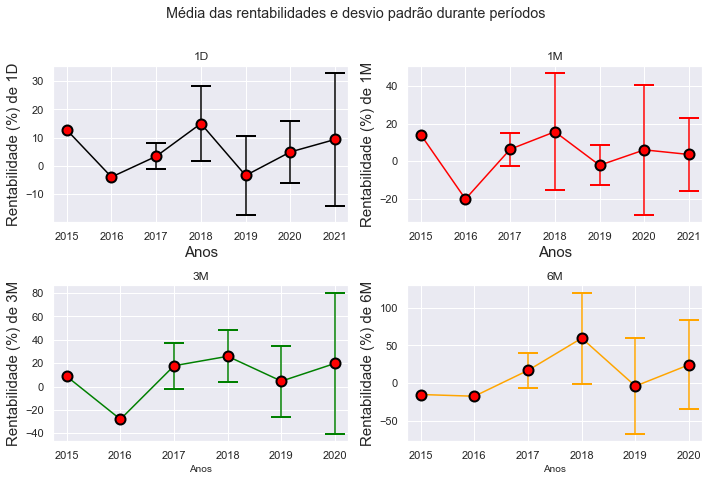

In [32]:
colors = {'1D':'black','1M':'red','3M':'green','6M':'orange'}
fig, axs = plt.subplots(2, 2)
#fig.title('Title', pad=20)
fig.suptitle('Média das rentabilidades e desvio padrão durante períodos\n\n', y=0.95)

for i,c in enumerate(['1D','1M','3M','6M']):
    df = pd.DataFrame(average_lineplot[c]).T
    x = np.array(df.index)
    y = np.array(df[0])
    erro = np.array(df[1])

    if i == 0 or i == 1:
        axs[0,i].errorbar(x,y,yerr=erro, 
                          color = colors[c], ls = '-', # cor e tipo da linha
                          fmt = 'o', mfc = 'red', mec = 'black',
                          mew = 2, ms = 10, 
                          ecolor = colors[c],
                          capsize = 10)

        axs[0,i].set_title(c)
        axs[0,i].set_xlabel('Anos', fontsize = 15)
        axs[0,i].set_ylabel(f'Rentabilidade (%) de {c}', fontsize = 15)

    else:
        axs[1,i-2].errorbar(x,y,yerr=erro, 
                            color = colors[c], ls = '-', # cor e tipo da linha
                            fmt = 'o', mfc = 'red', mec = 'black',
                            mew = 2, ms = 10, 
                            ecolor = colors[c],
                            capsize = 10)

        axs[1,i-2].set_title(c)

        axs[1,i-2].set_xlabel('Anos', fontsize = 10)
        axs[1,i-2].set_ylabel(f'Rentabilidade (%) de {c}', fontsize = 15)

    # plt.xlim([0,125])
    # plt.ylim([0,125])

fig.tight_layout(pad=1.0)

### 2015 a 2021

In [33]:
rent_df = pd.DataFrame(columns=["1D", "15D"])
time = [1, 10]
for t in tickers:
    rent_df.loc[t] = [rentability(t, c) for c in time]
rent_df.describe()

,1D,15D
count,69.000000,69.000000
mean,5.995371,5.621224
std,16.192957,17.366194
min,-27.586207,-27.764706
25%,-1.851852,-6.470588
50%,0.458333,4.216867
75%,8.947368,14.500000
max,96.969697,57.777778


In [34]:
def average_rentability_barplot():

    average_rent_dict = {2015: rent_df_15, 2016: rent_df_16, 2017: rent_df_17, 2018: rent_df_18, 2019: rent_df_19, 2020: rent_df_20,
                    2021: rent_df_21}

    total_average_dict = {}

    for c in ["1D", "1M", "3M", "6M"]:

        void_dict = {}
        auxiliar = 0
        for ano in range(2015, 2022):
            try:
                x = average_rent_dict[ano][c].mean() + auxiliar
                void_dict[ano] = [average_rent_dict[ano][c].mean(), average_rent_dict[ano][c].std(), x]
                auxiliar = x
            except:
                void_dict[ano] = np.nan

        total_average_dict[c] = void_dict    
    return total_average_dict

In [35]:
average_barplot = average_rentability_barplot()

In [36]:
average_barplot_1d = pd.DataFrame(average_barplot["1D"]).T.reset_index().rename(columns = {"index": "Ano", 0: "Media", 1: "Desvio", 2: "Acumulada"})
average_barplot_1m = pd.DataFrame(average_barplot["1M"]).T.reset_index().rename(columns = {"index": "Ano", 0: "Media", 1: "Desvio", 2: "Acumulada"})
average_barplot_3m = pd.DataFrame(average_barplot["3M"]).T.reset_index().rename(columns = {"index": "Ano", 0: "Media", 1: "Desvio", 2: "Acumulada"})
average_barplot_6m = pd.DataFrame(average_barplot["6M"]).T.reset_index().rename(columns = {"index": "Ano", 0: "Media", 1: "Desvio", 2: "Acumulada"})

In [37]:
def plot_average_barplot(df):
    sns.set(rc={'figure.figsize':(12,7)})
    sns.set_palette('colorblind')
    list_media = list(df["Media"])
    list_acumulada = list(df["Acumulada"]) + list_media    
    plt.ylim([round(min(list_acumulada) - 5), round(max(list_acumulada) + 5)])
    axes = sns.lineplot(data = df["Acumulada"], marker='o', sort = False)
    axes2 = sns.barplot(data = df, x='Ano', y="Media", alpha=0.5)
    for index, row in df.iterrows():
        axes.text(row.name, row.Media+0.175, round(row.Media,2), color="black", ha="center")
        axes2.text(row.name, row.Acumulada+0.175, round(row.Acumulada,2), color="black", ha="center")

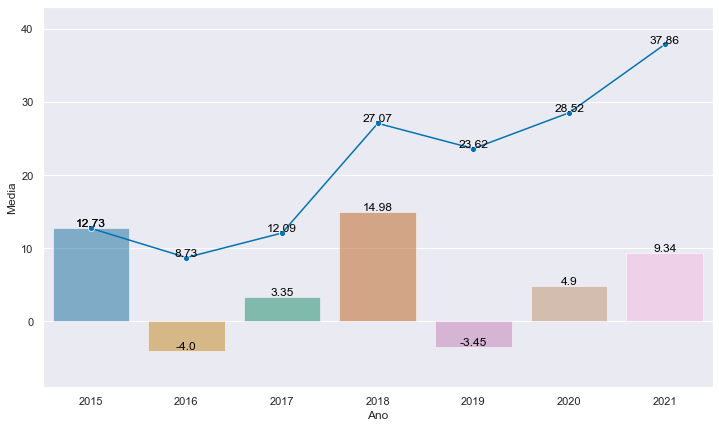

In [38]:
plot_average_barplot(average_barplot_1d)

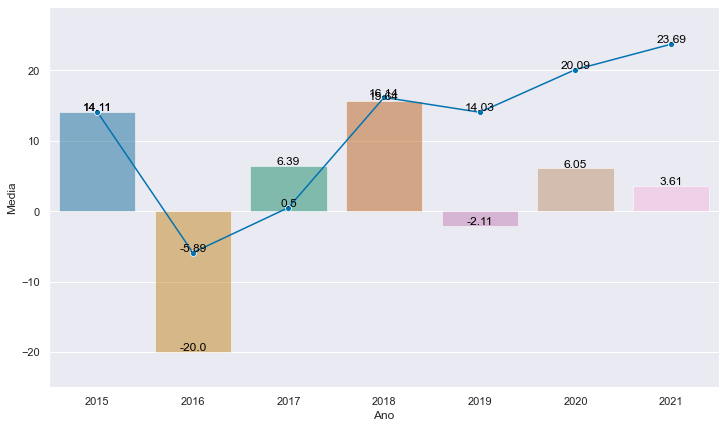

In [39]:
plot_average_barplot(average_barplot_1m)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


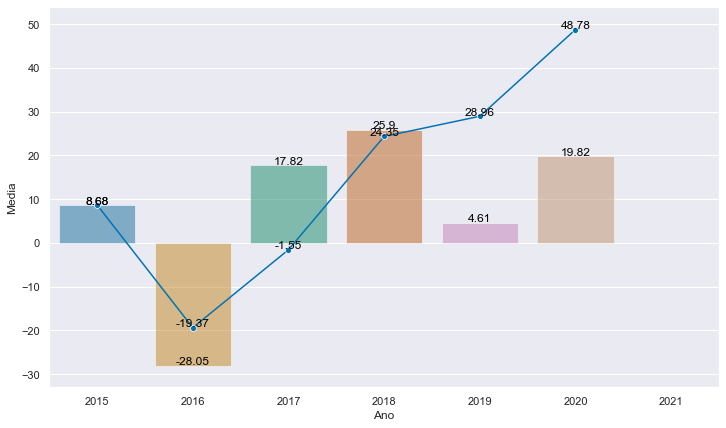

In [40]:
plot_average_barplot(average_barplot_3m)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


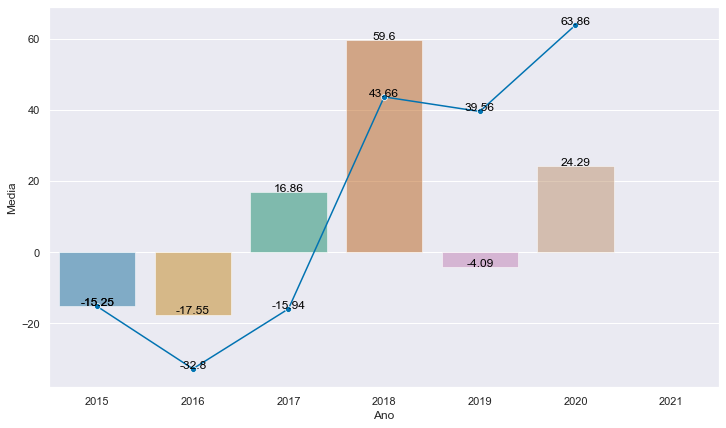

In [41]:
plot_average_barplot(average_barplot_6m)

## 4.3 Como se deu o comportamento das rentabilidades e volatilidades (incerteza de movimento) dos IPO's contra o IBOVESPA - índice que retrata a média da bolsa brasileira? 

In [42]:
import pandas_datareader.data as web
#Caso não tiver a biblioteca Yahoo Finance, tire a '#' da linha abaixo.
#!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
yf.pdr_override()

In [43]:
date_ipo_dict = dict(zip(tickers, list(date_ipo_df['date']) ))

In [91]:
from IPython.display import clear_output

historico_dict = {}

for ticker in tickers:
    clear_output(wait=True)
    y_ticker = f'{ticker}.SA'
    historico = web.get_data_yahoo(y_ticker)
    historico = historico.reset_index(drop=False)[['Date','Adj Close']]
    historico.insert(1,'Ticker',0)
    historico['Ticker'] = historico.apply(lambda x: ticker,axis=1)
    historico = historico[historico.Date >= date_ipo_dict[ticker] ]
    historico_dict[ticker] = historico


hist = historico_dict['WIZS3']
for ticker in historico_dict:
    if ticker == 'WIZS3':
       continue
    hist = pd.concat([hist,historico_dict[ticker]])

hist = hist.sort_values('Date')
hist = hist.reset_index(drop=True)

rent_by_day = hist.pivot_table(values='Adj Close', index='Date', columns='Ticker')

for c in rent_by_day: 
    fixing_close = hist[hist.Ticker == c].reset_index(drop=True).loc[0,'Adj Close']
    rent_by_day[c] = ((rent_by_day[c] / fixing_close) - 1)* 100

rent_by_day_mean = rent_by_day.mean(axis=1)
rent_by_day_mean = pd.DataFrame(data=rent_by_day_mean, columns=['variation'])
rent_by_day_mean = rent_by_day_mean.reset_index()
rent_by_day_mean['Date'] = rent_by_day_mean.apply(lambda x: pd.to_datetime(x.Date,format='%Y-%m-%d',errors='coerce'), axis=1)
rent_by_day_mean = rent_by_day_mean.set_index('Date')

[*********************100%***********************]  1 of 1 completed


In [46]:
cota_ibov = cota_ibov.reset_index()
cota_ibov['Date'] = cota_ibov.apply(lambda x: pd.to_datetime(x.Date,format='%Y-%m-%d',errors='coerce'), axis=1)
cota_ibov = cota_ibov.set_index("Date")
ipo_ibov = pd.concat([ rent_by_day_mean, cota_ibov], axis = 1)

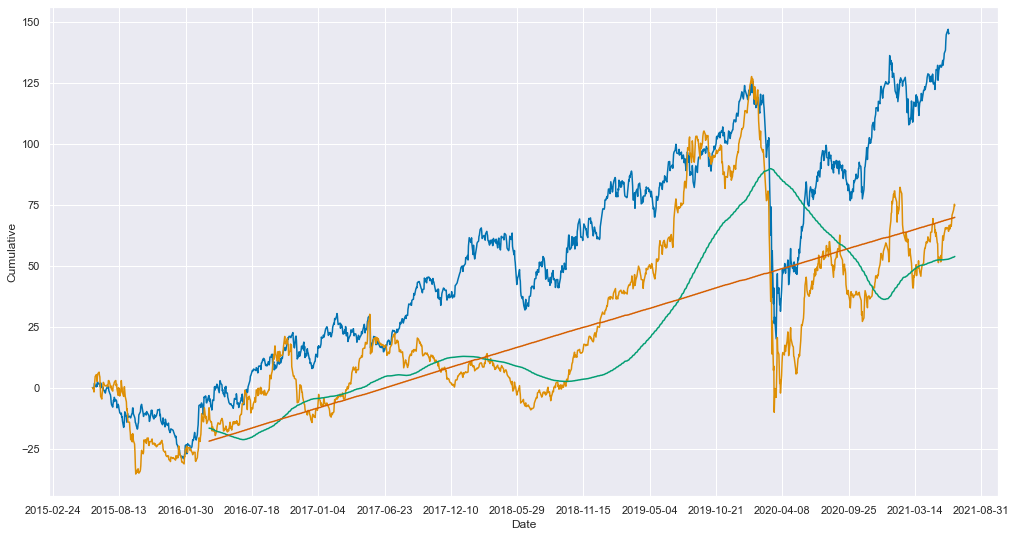

In [155]:
sns.set(rc={'figure.figsize':(17,9)})
sns.set_palette('colorblind')
loc = plticker.MultipleLocator(base=170.0)
axes = sns.lineplot( data=cota_ibov, x='Date', y='Cumulative')
axes2 = sns.lineplot(data=rent_by_day_mean, x = 'Date', y='variation')
axes3 = sns.lineplot(data=rent_mm, x='Date', y='media_movel_200')
axes4 = sns.lineplot(data=zeze, x='Date', y='lin_regress')
axes.xaxis.set_major_locator(loc)

In [48]:
ibov = cota_ibov.reset_index().copy()
variation = ipo_df.copy()
variation['var'] = variation.apply(lambda x: (x.preult - x.preabe)/x.preabe, axis = 1)

ibov['vol_media_diaria'] = 0
ibov['vol_media_anual'] = 0
ibov['codneg'] = 'ibov'

variation['vol_media_diaria'] = 0
variation['vol_media_anual'] = 0

ibov['indice'] = list(ibov.index)

variation['indice'] = list(variation.index)

def vol_ant(data, ativo):
    data = data[data.codneg == ativo]
    abertura = dict_tickers[ativo]

    if data.index.max() == 0:
        vol = np.array([data['var'][0], (data['preabe'][0] - abertura)/abertura]).std()  
        return vol
    else:
        vol = data['var'].std()
        return vol
    
def vol_ant_ibov(data, ativo):
    data = data[data.codneg == ativo]
    vol = data['Var%'].std()
    return vol

In [49]:
ibov['vol_media_diaria'] = ibov.apply(lambda x: vol_ant_ibov(ibov[:x['indice']+1],'ibov' ), axis = 1)
ibov = ibov.drop(columns='indice')
ibov['vol_media_anual'] = ibov['vol_media_diaria']*(252**(1/2))
ibov

,Date,index,Último,Var%,Cumulative,vol_media_diaria,vol_media_anual,codneg
0,2015-06-05,0,52973.37,-1.03,0.000000,NaN,NaN,ibov
1,2015-06-08,1,52809.63,-0.31,-0.309099,0.509117,8.081980,ibov
2,2015-06-09,2,52815.99,0.01,-0.297093,0.532666,8.455815,ibov
3,2015-06-10,3,53876.44,2.01,1.704762,1.301486,20.660455,ibov
4,2015-06-11,4,53688.51,-0.35,1.349999,1.150861,18.269345,ibov
...,...,...,...,...,...,...,...,...
1481,2021-06-02,1481,129601.44,1.04,144.653946,1.708187,27.116630,ibov
1482,2021-06-04,1482,130125.78,0.40,145.643764,1.707632,27.107812,ibov
1483,2021-06-07,1483,130776.27,0.50,146.871721,1.707092,27.099238,ibov
1484,2021-06-08,1484,129787.11,-0.76,145.004443,1.706654,27.092289,ibov


In [50]:
variation['vol_media_diaria'] = variation.apply(lambda x: vol_ant(variation[:x['indice']+1],x.codneg ), axis = 1)
variation = variation.drop(columns='indice')
variation['vol_media_anual'] = variation['vol_media_diaria']*(252**(1/2))
variation

,date,codneg,preabe,preult,var,vol_media_diaria,vol_media_anual
0,2015-06-05,WIZS3,13.60,13.90,0.022059,0.040471,0.642457
1,2015-06-08,WIZS3,14.11,13.78,-0.023388,0.032136,0.510136
2,2015-06-09,WIZS3,13.78,13.65,-0.009434,0.023280,0.369566
3,2015-06-10,WIZS3,13.70,14.00,0.021898,0.022884,0.363279
4,2015-06-11,WIZS3,14.01,14.26,0.017844,0.020932,0.332281
...,...,...,...,...,...,...,...
22518,2021-06-09,TFCO4,13.45,13.45,0.000000,0.027733,0.440245
22519,2021-06-09,VAMO3,52.41,51.96,-0.008586,0.026448,0.419845
22520,2021-06-09,VIVA3,31.37,31.66,0.009245,0.039168,0.621774
22521,2021-06-09,WEST3,8.83,8.77,-0.006795,0.039820,0.632130


In [89]:
var_by_day = variation.pivot_table(values='vol_media_anual', index= 'date', columns='codneg')
var_by_day_mean = var_by_day.mean(axis = 1)
var_by_day_mean = pd.DataFrame(data=var_by_day_mean, columns=['media_volatilidade'])
var_by_day_mean = var_by_day_mean.reset_index(drop=False)

In [52]:
ibov

,Date,index,Último,Var%,Cumulative,vol_media_diaria,vol_media_anual,codneg
0,2015-06-05,0,52973.37,-1.03,0.000000,NaN,NaN,ibov
1,2015-06-08,1,52809.63,-0.31,-0.309099,0.509117,8.081980,ibov
2,2015-06-09,2,52815.99,0.01,-0.297093,0.532666,8.455815,ibov
3,2015-06-10,3,53876.44,2.01,1.704762,1.301486,20.660455,ibov
4,2015-06-11,4,53688.51,-0.35,1.349999,1.150861,18.269345,ibov
...,...,...,...,...,...,...,...,...
1481,2021-06-02,1481,129601.44,1.04,144.653946,1.708187,27.116630,ibov
1482,2021-06-04,1482,130125.78,0.40,145.643764,1.707632,27.107812,ibov
1483,2021-06-07,1483,130776.27,0.50,146.871721,1.707092,27.099238,ibov
1484,2021-06-08,1484,129787.11,-0.76,145.004443,1.706654,27.092289,ibov


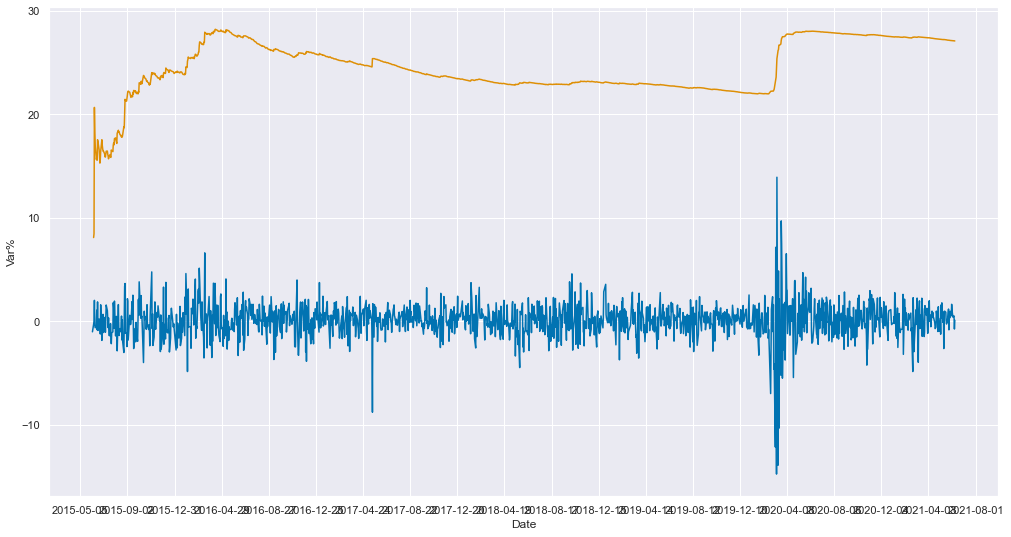

In [53]:
sns.set(rc={'figure.figsize':(17,9)})
sns.set_palette('colorblind')
loc = plticker.MultipleLocator(base=120.0)
axes = sns.lineplot( data=ibov, x='Date', y='Var%')
axes2 = sns.lineplot( data=ibov, x='Date', y='vol_media_anual')
axes.xaxis.set_major_locator(loc)

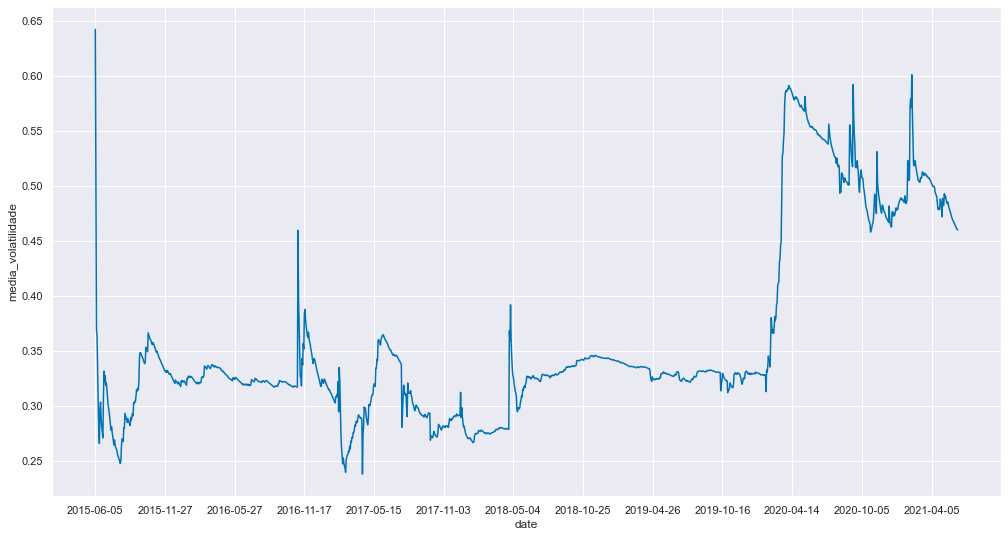

In [90]:
sns.set(rc={'figure.figsize':(17,9)})
sns.set_palette('colorblind')
loc = plticker.MultipleLocator(base=120.0)
axes = sns.lineplot( data=var_by_day_mean, x='date', y='media_volatilidade')
axes.xaxis.set_major_locator(loc)

In [94]:
def mm(dias,data,i):
    data = data.iloc[i-dias:i]
    return data.variation.mean()

In [111]:
rent_mm = rent_by_day_mean.copy()

In [127]:
rent_mm = rent_mm.reset_index()
rent_mm['indice'] = list(rent_mm.index)
rent_mm['media_movel_200'] = rent_mm.apply(lambda x: mm(200,rent_mm,x.indice), axis = 1)
rent_mm['media_movel_100'] = rent_mm.apply(lambda x: mm(100,rent_mm,x.indice), axis = 1)

In [128]:
rent_lr = rent_mm.copy()
rent_lr = rent_lr.dropna().reset_index(drop=True)
rent_lr['indice'] = list(rent_lr.index)
rent_lr

,index,Date,variation,indice,media_movel_200,media_movel_100
0,200,2016-03-30,-8.259702,0,-16.614291,-24.171418
1,201,2016-03-31,-10.317993,1,-16.655589,-24.016479
2,202,2016-04-01,-13.184864,2,-16.702862,-23.890779
3,203,2016-04-04,-14.140502,3,-16.759794,-23.800961
4,204,2016-04-05,-14.053596,4,-16.834093,-23.721420
...,...,...,...,...,...,...
1296,1496,2021-06-18,71.196678,1296,53.366088,60.362607
1297,1497,2021-06-21,72.895405,1297,53.460485,60.268761
1298,1498,2021-06-22,73.990177,1298,53.558159,60.191444
1299,1499,2021-06-23,75.154707,1299,53.652912,60.146813


In [133]:
result = linregress(rent_lr['indice'], rent_lr['media_movel_200'])
x = result.slope
y = result.intercept
print(f'{x}x + {y}')

0.07058873245582373x + -21.967875502971125


In [134]:
lista_x = list(rent_lr['indice'])
lista_y = []

In [135]:
for i in lista_x:
    lista_y.append(i*result.slope + result.intercept)

In [150]:
x = dict(zip(rent_lr['index'], lista_y))
linr= pd.DataFrame.from_dict(x, orient='index').rename(columns={0:'lin_regress'})
linr = linr.reset_index()

In [154]:
zeze = pd.merge(rent_mm, linr, how='outer', on= 'index')

In [137]:
rent_mm['linregress'] = lista_y

,index,Date,variation,indice,media_movel_200,media_movel_100
0,0,2015-06-05,0.000000,0,NaN,NaN
1,1,2015-06-08,-0.863337,1,NaN,NaN
2,2,2015-06-09,-1.798566,2,NaN,NaN
3,3,2015-06-10,0.719420,3,NaN,NaN
4,4,2015-06-11,2.589922,4,NaN,NaN
...,...,...,...,...,...,...
1496,1496,2021-06-18,71.196678,1496,53.366088,60.362607
1497,1497,2021-06-21,72.895405,1497,53.460485,60.268761
1498,1498,2021-06-22,73.990177,1498,53.558159,60.191444
1499,1499,2021-06-23,75.154707,1499,53.652912,60.146813


## 4.4 Existe correlação entre rentabilidade alta e outra variável que não seja bons fundamentos da empresa, ou seja, puramente especulação?

In [55]:
ipo_details['Media_faixa'] = (ipo_details['Min_faixa'] + ipo_details['Max_faixa']) / 2
ipo_details['%Faixa'] = (ipo_details['Preco_fixado'] / ipo_details['Media_faixa']) - 1

In [56]:
ipo_details

,Tickers,Preco_fixado,Total_Investidores,Volume,Varejo,Institucional,Estrangeiros,Outros,Min_faixa,Max_faixa,Setor,Media_faixa,%Faixa
0,WIZS3,12.33,4527,6.028000e+08,0.098221,0.374098,0.521481,0.006200,11.25,11.60,Seguro,11.425,0.079212
1,AALR3,20.00,2035,6.741976e+08,0.093510,0.369668,0.530330,0.006491,19.00,22.00,Saúde,20.500,-0.024390
2,MOVI3,7.50,1373,6.000838e+08,0.093400,0.308660,0.450425,0.147514,7.50,8.90,Transporte,8.200,-0.085366
3,PARD3,19.00,5042,8.776688e+08,0.100529,0.480254,0.413150,0.006067,18.71,22.71,Saúde,20.710,-0.082569
4,AZUL4,21.00,1753,2.021037e+09,0.063674,0.076148,0.858268,0.001910,19.00,23.00,Transporte,21.000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,GGPS3,12.00,0,2.164502e+09,0.000000,0.000000,0.000000,0.000000,13.00,15.50,Serviços,14.250,-0.157895
65,SOJA3,9.90,0,4.000000e+08,0.000000,0.000000,0.000000,0.000000,9.90,12.60,Commodities,11.250,-0.120000
66,CXSE3,9.67,0,4.351500e+09,0.000000,0.000000,0.000000,0.000000,9.33,12.67,Financeiro,11.000,-0.120909
67,MODL11,20.01,0,3.064532e+09,0.000000,0.000000,0.000000,0.000000,24.30,32.82,Financeiro,28.560,-0.299370


In [57]:
rent = rent_df.copy()
details = ipo_details.set_index('Tickers').copy()
correlacao = pd.concat([details, rent], axis =1)

In [58]:
today = rent_by_day.iloc[-1]

In [59]:
correlacao = pd.concat([correlacao, today], axis = 1)
correlacao.columns.values[14] = 'Today'

In [61]:
correlacao = correlacao.drop(columns=['Varejo', 'Institucional', 'Estrangeiros', 'Outros', 'Total_Investidores'])
correlacao

,Preco_fixado,Volume,Min_faixa,Max_faixa,Setor,Media_faixa,%Faixa,1D,15D,Today
WIZS3,12.33,6.028000e+08,11.25,11.60,Seguro,11.425,0.079212,12.733171,18.410381,84.936179
AALR3,20.00,6.741976e+08,19.00,22.00,Saúde,20.500,-0.024390,-4.000000,-23.750000,-38.233389
MOVI3,7.50,6.000838e+08,7.50,8.90,Transporte,8.200,-0.085366,-2.666667,-1.333333,135.373304
PARD3,19.00,8.776688e+08,18.71,22.71,Saúde,20.710,-0.082569,8.947368,5.526316,14.816827
AZUL4,21.00,2.021037e+09,19.00,23.00,Transporte,21.000,0.000000,6.666667,14.000000,109.821432
...,...,...,...,...,...,...,...,...,...,...
GGPS3,12.00,2.164502e+09,13.00,15.50,Serviços,14.250,-0.157895,6.666667,1.666667,30.710469
SOJA3,9.90,4.000000e+08,9.90,12.60,Commodities,11.250,-0.120000,46.464646,52.020202,-8.086422
CXSE3,9.67,4.351500e+09,9.33,12.67,Financeiro,11.000,-0.120909,3.929679,20.475698,30.069932
MODL11,20.01,3.064532e+09,24.30,32.82,Financeiro,28.560,-0.299370,-7.296352,-10.044978,-8.707861


<AxesSubplot:xlabel='Setor', ylabel='15D'>

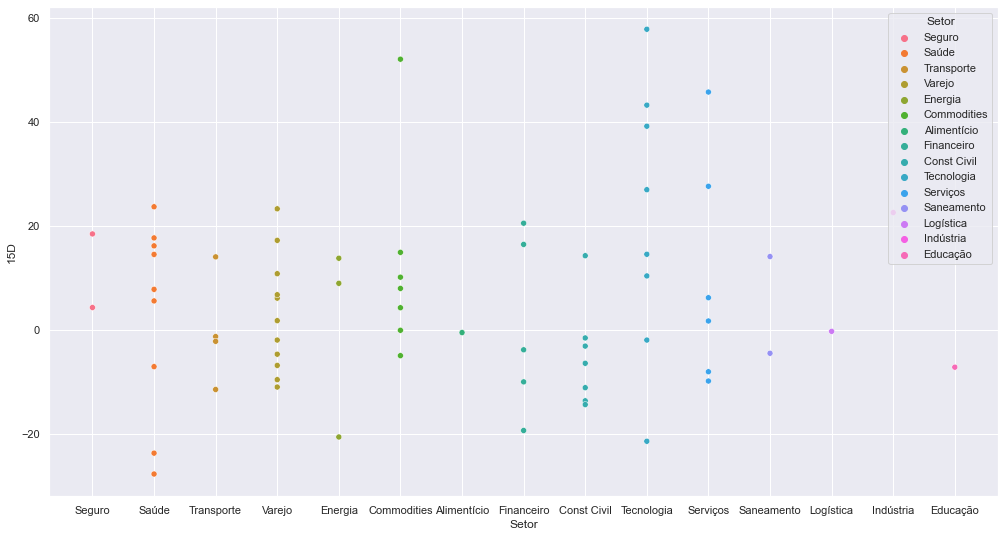

In [86]:
sns.scatterplot(data=correlacao[correlacao.index!='BIDI4'], x='Setor', y='15D', hue='Setor')

In [63]:
covid = covid_df.copy()

In [64]:
covid

,regiao,data,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,media_movel_14
0,Brasil,2020-02-25,0.0,0,0,0,NaN
1,Brasil,2020-02-26,1.0,1,0,0,NaN
2,Brasil,2020-02-27,1.0,0,0,0,NaN
3,Brasil,2020-02-28,1.0,0,0,0,NaN
4,Brasil,2020-02-29,2.0,1,0,0,NaN
...,...,...,...,...,...,...,...
472,Brasil,2021-06-09,17122877.0,85748,479515,2723,1768.642857
473,Brasil,2021-06-10,17210969.0,88092,482019,2504,1791.857143
474,Brasil,2021-06-11,17296118.0,85149,484235,2216,1810.357143
475,Brasil,2021-06-12,17374818.0,78700,486272,2037,1799.285714


In [65]:
ibov

,Date,index,Último,Var%,Cumulative,vol_media_diaria,vol_media_anual,codneg
0,2015-06-05,0,52973.37,-1.03,0.000000,NaN,NaN,ibov
1,2015-06-08,1,52809.63,-0.31,-0.309099,0.509117,8.081980,ibov
2,2015-06-09,2,52815.99,0.01,-0.297093,0.532666,8.455815,ibov
3,2015-06-10,3,53876.44,2.01,1.704762,1.301486,20.660455,ibov
4,2015-06-11,4,53688.51,-0.35,1.349999,1.150861,18.269345,ibov
...,...,...,...,...,...,...,...,...
1481,2021-06-02,1481,129601.44,1.04,144.653946,1.708187,27.116630,ibov
1482,2021-06-04,1482,130125.78,0.40,145.643764,1.707632,27.107812,ibov
1483,2021-06-07,1483,130776.27,0.50,146.871721,1.707092,27.099238,ibov
1484,2021-06-08,1484,129787.11,-0.76,145.004443,1.706654,27.092289,ibov


In [66]:
tristeza = ibov.copy()
tristeza = tristeza[ibov.Date >= '2021-01-01']
tristeza = tristeza.reset_index(drop=True)
tristeza = tristeza.rename(columns={'Date': 'data'})
tristeza

,data,index,Último,Var%,Cumulative,vol_media_diaria,vol_media_anual,codneg
0,2021-01-04,1379,118854.71,-0.14,124.366904,1.731321,27.483877,ibov
1,2021-01-05,1380,119376.21,0.44,125.351361,1.730722,27.474364,ibov
2,2021-01-06,1381,119100.08,-0.23,124.830099,1.730115,27.464721,ibov
3,2021-01-07,1382,122385.92,2.76,131.032913,1.730997,27.478730,ibov
4,2021-01-08,1383,125076.63,2.20,136.112277,1.731314,27.483756,ibov
...,...,...,...,...,...,...,...,...
102,2021-06-02,1481,129601.44,1.04,144.653946,1.708187,27.116630,ibov
103,2021-06-04,1482,130125.78,0.40,145.643764,1.707632,27.107812,ibov
104,2021-06-07,1483,130776.27,0.50,146.871721,1.707092,27.099238,ibov
105,2021-06-08,1484,129787.11,-0.76,145.004443,1.706654,27.092289,ibov


In [67]:
desgraca = var_by_day_mean.copy()
desgraca = desgraca[desgraca.index >= '2020-01-01']
desgraca = desgraca.reset_index()
desgraca = desgraca.rename(columns={'date': 'data'})
desgraca

,data,media_volatilidade
0,2020-01-02,0.329767
1,2020-01-03,0.329463
2,2020-01-06,0.329377
3,2020-01-07,0.329521
4,2020-01-08,0.329931
...,...,...
351,2021-06-02,0.464182
352,2021-06-04,0.462800
353,2021-06-07,0.461412
354,2021-06-08,0.460935


In [68]:
derrota = pd.merge(desgraca, covid, how='inner', on= 'data')
derrota[100:150]

,data,media_volatilidade,regiao,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,media_movel_14
100,2020-07-21,0.538746,Brasil,2159654.0,41008,81487,1367,1045.214286
101,2020-07-22,0.535783,Brasil,2227514.0,67860,82771,1284,1053.285714
102,2020-07-23,0.534099,Brasil,2287475.0,59961,84082,1311,1057.642857
103,2020-07-24,0.532044,Brasil,2343366.0,55891,85238,1156,1064.142857
104,2020-07-27,0.530132,Brasil,2442375.0,23284,87618,614,1064.571429
105,2020-07-28,0.528271,Brasil,2483191.0,40816,88539,921,1056.071429
106,2020-07-29,0.526851,Brasil,2552265.0,69074,90134,1595,1029.000000
107,2020-07-30,0.526394,Brasil,2610102.0,57837,91263,1129,1054.857143
108,2020-07-31,0.525027,Brasil,2662485.0,52383,92475,1212,1041.071429
109,2020-08-03,0.520688,Brasil,2750318.0,16641,94665,561,1044.000000


In [69]:
derrota.corr()

,media_volatilidade,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,media_movel_14
media_volatilidade,1.000000,-0.392620,-0.203836,-0.394577,-0.088345,-0.287171
casosAcumulado,-0.392620,1.000000,0.729712,0.993778,0.703938,0.785086
casosNovos,-0.203836,0.729712,1.000000,0.723750,0.858980,0.701642
obitosAcumulado,-0.394577,0.993778,0.723750,1.000000,0.706310,0.801514
obitosNovos,-0.088345,0.703938,0.858980,0.706310,1.000000,0.866378
media_movel_14,-0.287171,0.785086,0.701642,0.801514,0.866378,1.000000


In [77]:
af = pd.concat([tristeza.set_index('data'), covid[covid.data>='2021-01-01'].set_index('data')],axis=1)
af[100:150]

,index,Último,Var%,Cumulative,vol_media_diaria,vol_media_anual,codneg,regiao,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,media_movel_14
data,,,,,,,,,,,,,
2021-04-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Brasil,13445006.0,71832,351334,2616,2971.857143
2021-04-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Brasil,13482023.0,37017,353137,1803,2913.142857
2021-04-12,1445.0,118811.74,0.97,124.285787,1.722966,27.351238,ibov,Brasil,13517808.0,35785,354617,1480,2923.642857
2021-04-13,1446.0,119297.13,0.41,125.202078,1.722393,27.342147,ibov,Brasil,13599994.0,82186,358425,3808,2910.785714
2021-04-14,1447.0,120294.68,0.84,127.085194,1.721917,27.334583,ibov,Brasil,13673507.0,73513,361884,3459,2912.785714
2021-04-15,1448.0,120700.67,0.34,127.851598,1.721337,27.325373,ibov,Brasil,13746681.0,73174,365444,3560,2883.500000
2021-04-16,1449.0,121113.93,0.34,128.631726,1.720757,27.316172,ibov,Brasil,13832455.0,85774,368749,3305,2868.571429
2021-04-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Brasil,13900091.0,67636,371678,2929,2895.928571
2021-04-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Brasil,13943071.0,42980,373335,1657,2963.214286


In [76]:
af.corr()

,index,Último,Var%,Cumulative,vol_media_diaria,vol_media_anual,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,media_movel_14
index,1.000000,0.423836,0.120502,0.423836,-0.909033,-0.909033,0.998799,0.232346,0.987553,0.499698,0.750466
Último,0.423836,1.000000,0.236647,1.000000,-0.697092,-0.697092,0.453982,-0.120377,0.528011,-0.044848,0.101662
Var%,0.120502,0.236647,1.000000,0.236647,-0.115120,-0.115120,0.122069,0.145315,0.121926,0.103291,0.095538
Cumulative,0.423836,1.000000,0.236647,1.000000,-0.697092,-0.697092,0.453982,-0.120377,0.528011,-0.044848,0.101662
vol_media_diaria,-0.909033,-0.697092,-0.115120,-0.697092,1.000000,1.000000,-0.919788,-0.084099,-0.949992,-0.278324,-0.523299
vol_media_anual,-0.909033,-0.697092,-0.115120,-0.697092,1.000000,1.000000,-0.919788,-0.084099,-0.949992,-0.278324,-0.523299
casosAcumulado,0.998799,0.453982,0.122069,0.453982,-0.919788,-0.919788,1.000000,0.721189,0.993868,0.680277,0.784071
casosNovos,0.232346,-0.120377,0.145315,-0.120377,-0.084099,-0.084099,0.721189,1.000000,0.716432,0.863530,0.690060
obitosAcumulado,0.987553,0.528011,0.121926,0.528011,-0.949992,-0.949992,0.993868,0.716432,1.000000,0.682963,0.798792
obitosNovos,0.499698,-0.044848,0.103291,-0.044848,-0.278324,-0.278324,0.680277,0.863530,0.682963,1.000000,0.844199


<AxesSubplot:xlabel='obitosNovos', ylabel='vol_media_diaria'>

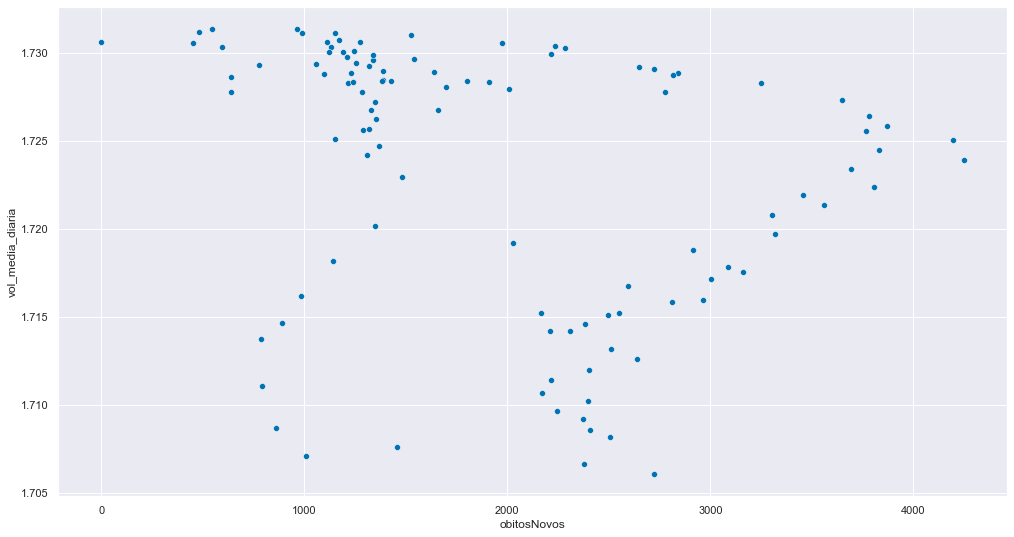

In [84]:
sns.scatterplot(data=af, x='obitosNovos', y='vol_media_diaria')

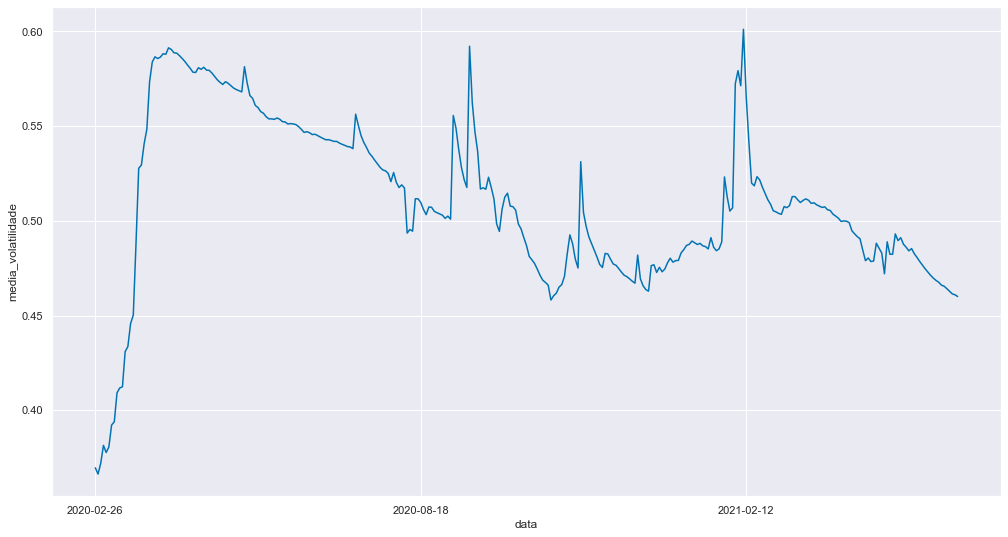

In [73]:
sns.set(rc={'figure.figsize':(17,9)})
sns.set_palette('colorblind')
loc = plticker.MultipleLocator(base=120.0)
axes = sns.lineplot( data=derrota, x='data', y='media_volatilidade')

axes.xaxis.set_major_locator(loc)

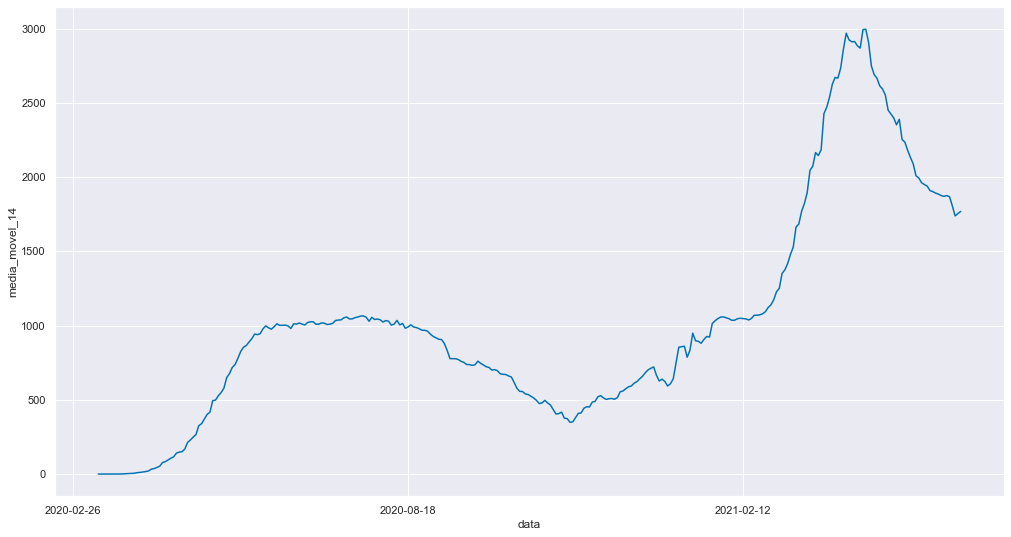

In [74]:
sns.set(rc={'figure.figsize':(17,9)})
sns.set_palette('colorblind')
loc = plticker.MultipleLocator(base=120.0)
axes = sns.lineplot( data=derrota, x='data', y='media_movel_14')
axes.xaxis.set_major_locator(loc)

# 5 Conclusão